# Naive Bayes Classification 


## Resources Used
For this project I will be using Jake VanderPlas's Naive Bayes notebook and making changes to it. 
- Link to the notebook: https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb

- Chatgpt 

- Implementing 3 Naive Bayes classifiers in scikit-learn https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/


# Business Understanding 

### For Multinomial Naive Bayes 
Link to dataset: https://archive.ics.uci.edu/dataset/94/spambase

**Objective:** To explore two Naive Bayes classifiers, Gaussian Naive Bayes and Multinomial Naive Bayes, and to build a model that can classify SMS messages as spam or ham.

**Success Criteria:** An understanding of both classifiers and a model with high accuracy that can filter out spam or ham messages.

### For Gaussian Naive Bayes 
Link to dataset: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

**Objective:** To explore Gaussian Naive Bayes (GNB) classification for height and weight data and gain insights into its performance in predicting weight categories based on height and weight features.

**Success Criteria:** Produce clear and informative visualizations like scatter plots that illustrate the relationship between height, weight, and predicted weight categories, facilitating better understanding of how Gaussian Naive Bayes works. 



# Data Understanding 
I first started with understanding what Gaussisian Naive Bayes and Multinomial Naive Bayes is actually doing to data and the difference between both classifiers.  

## Gaussian Naive Bayes
Gaussian Naive Bayes is a classifier that is based on the assumption that the features follow a Gaussian distribution. This means that it assumes that the features are continuous and normally distributed e.g  heights or weights of people, tend to follow a normal distribution. In this distribution, the majority of the data points are clustered around the mean (average) value, and the further away from the mean you go, the fewer data points you find. 

## Multinomial Naive Bayes 
Multinomial Naive Bayes is a classifier that is based on the assumption that the features are discrete and follow a multinomial distribution. This means that it assumes that the features are categorical and can take on a finite number of values, for example, if we're looking at words in a text, we might count how many times each word appears. 


### SMS Text Dataset 
**Data Collection:** The spam.csv dataset contains SMS messages labeled as spam or ham.  

**Data Description:** The dataset has two columns: v1 (label) and v2 (SMS text).  

**Data Exploration:** Explore the dataset to understand its size, structure, and distribution of labels.

### Heights and Weights Dataset 
**Data Collection:** The dataset was obtained from Kaggle and contains information about individuals' heights and weights. 

**Data Description:** The dataset has two columns: 'Height' (in inches) and 'Weight' (in pounds)

**Data Exploration:** Examine the dataset's characteristics, including its size, data types, and distribution of labels. 

# Data Preparation 
## SMS Text Dataset 
**Data Cleaning:** Handled any missing values or duplicated SMS messages.

**Feature Engineering:** The text data is converted into numerical data using the CountVectorizer technique from `sklearn.feature_extraction.text`.

**Train-Test Split:** The data is split into training and testing sets using `train_test_split` from `sklearn.model_selection`.


# Modelling
### Model Building
#### SMS Text Dataset
**Model Selection:** A Multinomial Naive Bayes classifier is chosen for the task of classifying SMS messages as spam or ham.

**Model Training:** The Multinomial Naive Bayes model is trained on the SMS text data.

**Model Evaluation:** The performance of the model is evaluated using accuracy score and a confusion matrix. The confusion matrix helps in visualizing the true positives, true negatives, false positives, and false negatives.

**Example Usage:** The trained model is capable of predicting whether a given message is spam or ham. Example messages are provided to demonstrate the model's predictions.

**Model Persistence:** The trained model and the vectorizer used for feature extraction are saved to disk using the `pickle` module for future use. This ensures that the trained model can be deployed and used in production environments without the need for retraining.




# Evaluation 
##  Spam Detection Model Evaluation
**Model Performance:** The model's performance was evaluated using the accuracy score, which measures the proportion of correctly classified instances out of the total instances. The accuracy score obtained was 0.9838565022421525. 


# Deployment 

I deployed a spam detection app using Multinomial Naive Bayes and Pickle. This will determine if a piece of text may be considered spam or not spam (ham). I deployed it on Python Anywhere. 

Link to app: https://c00257967.pythonanywhere.com/

## Example texts to use: 

**Example usage**

message = "Congratulations, you have won the lottery!"

prediction = "Spam"

**Example usage**

message = "Hey, what are you doing?"

prediction = "Ham"


In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

# Changing the following data:
For the first part of changing this dataset I decided to make the following changes to it:
- n_samples=1000: Specifies the total number of data points to generate, which was originally set to 100 but I decided to set it to 1000.
- centers=10: Indicates the number of clusters to generate. The data points will be distributed among 10 clusters unlike in the previous version where the clusters where set to 2.
- cluster_std=3.5: Defines the standard deviation of the clusters. A higher value of cluster_std results in clusters that are more spread out, in this scenario I have changed the original value of 1.5 to 3.5. 


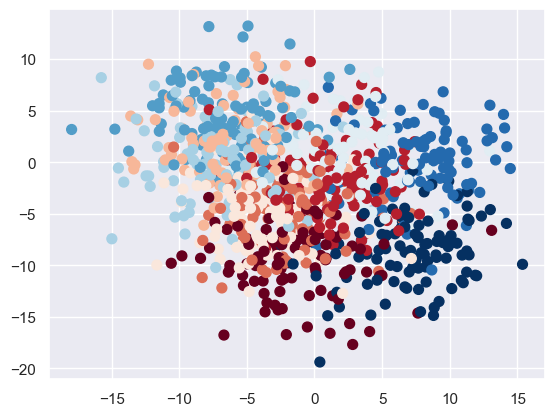

In [88]:
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, 2, centers=10, random_state=2, cluster_std=3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [89]:
from sklearn.naive_bayes import GaussianNB

# Create the model
model = GaussianNB()

# Fit the model
model.fit(X, y);

In [90]:
# Generate some new data
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

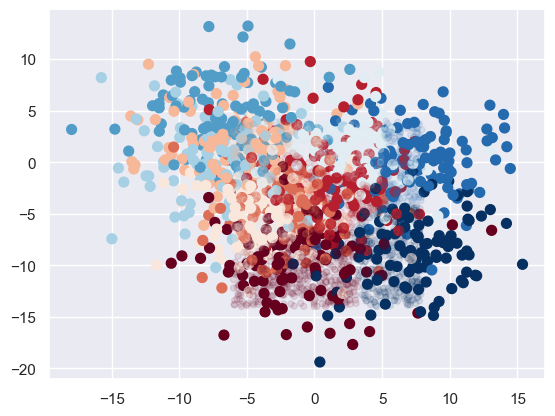

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# Adding In A Height Weight Dataset For the Gaussian Naive Bayes 

In [111]:
import os
import pandas as pd

# Added in an encoding parameter
data = pd.read_csv("HeightWeight.csv", encoding='latin1')

# Display the data
print(data)


       ï»¿Index    Height    Weight
0             1  65.78331  112.9925
1             2  71.51521  136.4873
2             3  69.39874  153.0269
3             4  68.21660  142.3354
4             5  67.78781  144.2971
...         ...       ...       ...
24995     24996  69.50215  118.0312
24996     24997  64.54826  120.1932
24997     24998  64.69855  118.2655
24998     24999  67.52918  132.2682
24999     25000  68.87761  124.8742

[25000 rows x 3 columns]


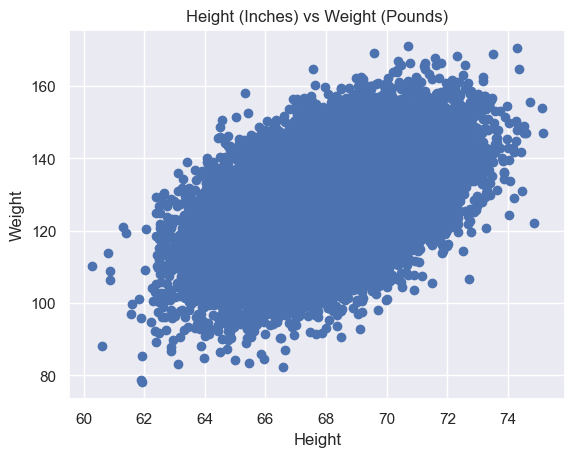

In [119]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# Plot the data
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height (Inches) vs Weight (Pounds)')
plt.show()


In [124]:
print(data.columns)


Index(['ï»¿Index', 'Height', 'Weight'], dtype='object')


In [125]:
data.rename(columns={'ï»¿Index': 'Index'}, inplace=True)


In [126]:
print(data.columns)

Index(['Index', 'Height', 'Weight'], dtype='object')


Split the data into features (X) and target (y):

In [134]:
X = data[['Height', 'Weight']].to_numpy()
y = data['Index'].to_numpy()


Create and train the Gaussian Naive Bayes model:

In [135]:
model = GaussianNB()
model.fit(X, y)


GaussianNB()

Generate new data points for prediction:

In [136]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)


Plot the original data points and the new data points with their predicted labels:

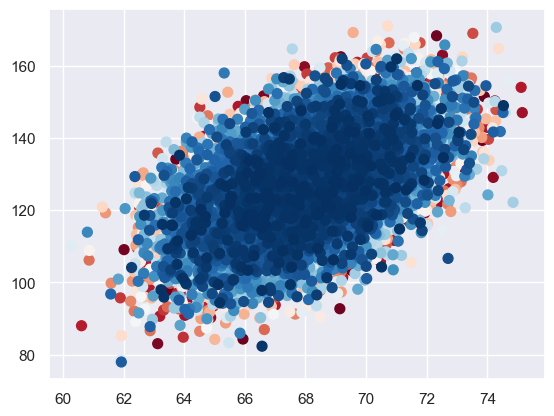

In [137]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.show()


In [138]:
yprob = model.predict_proba(Xnew)
print(yprob[-8:].round(2))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Multinomial Naive Bayes

For Multinomial Naive Bayes, I will be using a SMS spam dataset. I will also be using Jake VanderPlas's notebook on Naive Bayes classifation and noting the changes below. 

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

I first started with loading the spam.csv into this notebook 

In [101]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin1')

I then split the data into x and y and created my test and training variables similar to Jake VanderPlas's notebook, except I have four test and training labels. 

In [102]:
# Prepare the data
X = data['v2']
y = data['v1']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Representive entry from the training data

In [103]:
# print the X_train data
print(X_train)

# print the y_train data
print(y_train)



1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 4457, dtype: object
1978     ham
3989    spam
3935     ham
4078     ham
4086    spam
        ... 
3772     ham
5191     ham
5226     ham
5390     ham
860      ham
Name: v1, Length: 4457, dtype: object


To use this data, I need to convert the content of each string into a vector of numbers. I will use the TF-ODF vectorizer. 

In [104]:

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

I can now apply the model to the training data, and predict labels for the test data:

In [105]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Since I now have the predicted labels for the test data I can now evaluate them to learn about the performance of the estimator. This is the confusion matrix between the true and predicted labels for the test data. The top-left corner of the confusion matrix represents the True Negative (TN) count, which is the number of instances that were correctly classified as not spam. The top-right corner represents the False Positive (FP) count, which is the number of instances that were incorrectly classified as spam. The bottom-left corner represents the False Negative (FN) count, which is the number of instances that were incorrectly classified as not spam. The bottom-right corner represents the True Positive (TP) count, which is the number of instances that were correctly classified as spam.

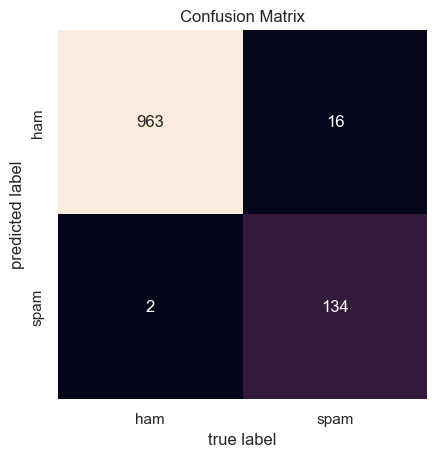

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()

The accuracy score is: 

In [107]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


## Example usage of the trained model:
 This code demonstrates how to use the trained model to predict the category (spam or ham) for a given text message.
It uses the vectorizer to transform the text message into a numerical vector and then predicts the category using the trained model.
 The prediction is printed to the console.


In [108]:
# Example usage
message = "Congratulations, you have won a lottery!"
X_message = vectorizer.transform([message])
prediction = model.predict(X_message)
print("Prediction:", prediction[0])

# Example usage
message = "Hey, what are you doing?"
X_message = vectorizer.transform([message])
prediction = model.predict(X_message)
print("Prediction:", prediction[0])

Prediction: spam
Prediction: ham


## Saving the trained model and vectorizer:
 This code saves the trained model and vectorizer to disk using the pickle module.
 The trained model is saved as 'spam_model.pkl' and the vectorizer is saved as 'vectorizer.pkl'.
#These files can be loaded later to use the trained model and vectorizer for making predictions.


In [109]:
# Save the trained model
import pickle

with open('spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)